# Vigenere cipher
The Vigenere cipher is a method of encrypting alphabetic text by using a series of interwoven Caesar ciphers, based on the letters of a keyword. It employs a form of polyalphabetic substitution.

In a Caesar cipher, each letter of the alphabet is shifted along some number of places. For example, in a Caesar cipher of shift 3, a would become D, b would become E, y would become B and so on. The Vigenere cipher has several Caesar ciphers in sequence with different shift values.

## Encrypted message analysis
To start analysis let's take a look at our initial encrypted message

In [1]:
with open("Text1.txt", "r",encoding="utf8") as f:
    main_message = f.read()

print("Encrypted message: \n" + main_message)
print("\nMessage length: " + str(len(main_message)))

Encrypted message: 
AMIJSIEIAHDFXVIMAEWRJKESWESGSVEJZBPJKMRZCBNXXKODSAIUVXNSSLEYSOENGGTYWBRWAKSKNBCKGKYRYTIEKMTYWXVZDZACSVTZUXMGAKEUMKIEYMHVTTTKDXRVTXLJHBEJETNRYXDKGLTVSESVUKEKHEAEKMOKZXEDHBRVKNLKAFAKWPERHHNKZXDVSMHJLTRRFTRDGKEUKIATWLTRLBOEOBTYWGOLYAPFOXRKGWEJLKOPSGEELBRVHEAEWMPLJLUVVUYKZXEDHBRVKLIEALTVJTGVFMSGJBNTWLSCWBAISVEJZHMVSUORJWHVJLTRJLHZHVUJLHDZSGOWLAEJLHLVFILRFLTYSMCRFLAMWAEIHXOGDXAEVKEJLHRVXKEVVHMKGMHVYTLRPR

Message length: 402


For futher decryption we should calculate the frequencies of the letters in our initial message and compare their distribution to the natural letter frequency distribution from open sources

In [2]:
import pandas as pd
import numpy as np


main_letters = list(set(main_message)) 

main_count_letters = [main_message.count(i)/len(main_message)*100 for i in main_letters]
    
df = pd.DataFrame({'Letters': main_letters, 'Frequency': main_count_letters})
df = df.sort_values(by='Frequency', ascending = False).reset_index(drop=True)

df

,Letters,Frequency
0,E,8.208955
1,K,7.213930
2,V,6.716418
3,L,6.467662
4,R,5.472637
5,T,5.223881
6,H,4.975124
7,S,4.975124
8,A,4.726368
9,J,4.477612


Here is a natural letter frequency distribution from the <a href="https://en.wikipedia.org/wiki/Letter_frequency">wikipedia article</a>

In [3]:
nat_letters = ['E', 'T', 'A', 'O', 'I', 'N', 'S', 'H', 'R', 'D', 'L', 'C', 'U', 'M', 'W', 'F', 'G', 'Y', 'P', 'B', 'V',
               'K', 'X', 'J', 'Q', 'Z']

nat_letters_freq = [13.0, 9.1, 8.2, 7.5, 7.0, 6.7, 6.3, 6.1, 6.0, 4.3, 4.0, 2.8, 2.8, 2.4, 2.4, 2.2, 2.0, 2.0, 1.9, 1.5,
                    0.98, 0.77, 0.15, 0.15, 0.095, 0.074]

And now let's compare natural and encrypted frequencies with barplot

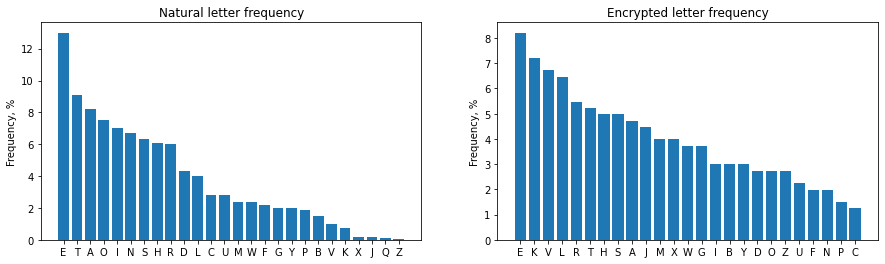

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(15,4))

ax[0].bar(np.arange(len(nat_letters_freq)), nat_letters_freq)
ax[0].set_xticks(np.arange(len(nat_letters_freq)), nat_letters)
ax[0].set_title('Natural letter frequency')
ax[0].set_ylabel('Frequency, %')

ax[1].bar(np.arange(len(df['Letters'])), df['Frequency'])
ax[1].set_xticks(np.arange(len(df['Letters'])), df['Letters'])
ax[1].set_title('Encrypted letter frequency')
ax[1].set_ylabel('Frequency, %')

plt.show()

It's obviously that we have different shape of these distributions. It means this is not Caesar cipher (which is the same with Vigenere cipher with key length equals 1), so we need to find out the key length.

## Key length search

We should find all the repeated parts in our encrypted text and calculate the distancies between them

In [5]:
words_freq = []
for n in range(5,14):
    for i in range(len(main_message)-n+1):
        word = main_message[i:i+n]
        j=i
        pos = main_message.find(word)
        pos_ar = []
        if main_message.find(word, j+n) != -1:
            while main_message.find(word, j+n) != -1:
                pos_ar.append(main_message.find(word, j+n)-pos)
                pos = main_message.find(word, j+n)
                j = main_message.find(word, j+n)
            words_freq.append([len(word), word, pos_ar])

words_freq

[[5, 'SVEJZ', [276]],
 [5, 'KZXED', [104]],
 [5, 'ZXEDH', [104]],
 [5, 'XEDHB', [104]],
 [5, 'EDHBR', [104]],
 [5, 'DHBRV', [104]],
 [5, 'HBRVK', [104]],
 [6, 'KZXEDH', [104]],
 [6, 'ZXEDHB', [104]],
 [6, 'XEDHBR', [104]],
 [6, 'EDHBRV', [104]],
 [6, 'DHBRVK', [104]],
 [7, 'KZXEDHB', [104]],
 [7, 'ZXEDHBR', [104]],
 [7, 'XEDHBRV', [104]],
 [7, 'EDHBRVK', [104]],
 [8, 'KZXEDHBR', [104]],
 [8, 'ZXEDHBRV', [104]],
 [8, 'XEDHBRVK', [104]],
 [9, 'KZXEDHBRV', [104]],
 [9, 'ZXEDHBRVK', [104]],
 [10, 'KZXEDHBRVK', [104]]]

As we can see we have 104 and 276 distancies. The greatest common divisor of these numbers is 4. It means that we should start with the key length equal to 4

In [6]:
key_length = 4

### Decryption functions

<p><img style="float: right;margin:5px 20px 5px 1px; max-width:400px" src="https://upload.wikimedia.org/wikipedia/commons/9/9a/Vigen%C3%A8re_square_shading.svg"></p>
To encrypt, a table of alphabets can be used, termed a tabula recta, Vigenère square or Vigenère table. It has the alphabet written out 26 times in different rows, each alphabet shifted cyclically to the left compared to the previous alphabet, corresponding to the 26 possible Caesar ciphers. At different points in the encryption process, the cipher uses a different alphabet from one of the rows. The alphabet used at each point depends on a repeating keyword.

Decryption is performed by going to the row in the table corresponding to the key, finding the position of the ciphertext letter in that row and then using the column's label as the plaintext.

This method implemented into originalText function.

In [7]:
def originalText(cipher_text, key):
    '''Decrypts text with the one letter key'''
    orig_text = []
    for i in range(len(cipher_text)):
        x = (ord(cipher_text[i]) -
             ord(key) + 26) % 26
        x += ord('A')
        orig_text.append(chr(x))
    return("" . join(orig_text))

Also we need two functions to split our text into key_length parts and to merge splitted text back

In [8]:
def split_message(message, n):
    '''Splits message into n parts Every i-th letter goes to the i-th part of messages_list'''
    messages_list = [''] * n
    for i in range(len(message)):
        messages_list[i%n]+=message[i]
    return messages_list

In [9]:
def merge_message(message_array):
    '''Merges splitted message'''
    result = ['']*len(message_array[0])
    for i in message_array:
        for j in range(len(i)):
            result[j] += i[j]
    return ''.join(result)

## Keys search

To find the key we should compare letters distribution for each splitted message with the natural letters distribution for every key letter and then calculate the Match Score. In our case Match Score calculates as the sum of distancies between corresponding letters positions in natural and decrypted distributions. The less Match Score of key letter the bigger probability of its correctness. Our output shows us the key letters for each position in Vigenere key sorted by distancies.

In [10]:
message_splitted = split_message(main_message, key_length)
res_f=[]
for j in range(key_length):
    res = []
    for i in range(ord('A'),ord('Z')+1): 
        decrypted_text = originalText(message_splitted[j], chr(i))

        main_count_letters = [decrypted_text.count(i)/len(decrypted_text) for i in nat_letters]

        df_n = pd.DataFrame({'Letters': nat_letters, 'Frequency': main_count_letters})
        df_n = df_n.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
        df_n['Natural letters'] = nat_letters
        dist = 0
        for k in range(len(df_n)):
            dist += abs(k - df_n[df_n['Natural letters'] == df_n.iloc[k,0]].index[0])

        res.append([dist,chr(i)])
    res_f.append(sorted(res))
for j in range(key_length):
    print(res_f[j])
    print()

[[82, 'S'], [150, 'H'], [182, 'O'], [186, 'D'], [196, 'T'], [202, 'W'], [210, 'R'], [214, 'L'], [222, 'Z'], [226, 'E'], [234, 'F'], [234, 'G'], [234, 'P'], [236, 'C'], [236, 'Y'], [238, 'U'], [240, 'J'], [246, 'A'], [246, 'V'], [250, 'N'], [252, 'Q'], [254, 'I'], [258, 'B'], [258, 'M'], [258, 'X'], [264, 'K']]

[[78, 'T'], [176, 'I'], [182, 'E'], [184, 'X'], [208, 'U'], [212, 'D'], [212, 'P'], [220, 'S'], [224, 'R'], [226, 'H'], [228, 'A'], [230, 'Z'], [232, 'G'], [232, 'J'], [232, 'M'], [236, 'B'], [236, 'C'], [238, 'K'], [240, 'N'], [242, 'O'], [246, 'Q'], [254, 'F'], [256, 'Y'], [258, 'V'], [268, 'W'], [280, 'L']]

[[40, 'A'], [182, 'P'], [186, 'E'], [186, 'L'], [204, 'W'], [212, 'K'], [214, 'G'], [216, 'B'], [222, 'M'], [222, 'N'], [226, 'H'], [226, 'Q'], [226, 'V'], [228, 'R'], [230, 'T'], [234, 'U'], [234, 'Z'], [238, 'Y'], [240, 'I'], [244, 'J'], [250, 'O'], [256, 'C'], [256, 'S'], [258, 'X'], [260, 'D'], [260, 'F']]

[[60, 'R'], [182, 'G'], [198, 'C'], [198, 'V'], [202, 'S'], [

There is a big difference in distancies (between first and others), so we can take the first letters from every list and compose a Vigenere key from them. In case of less differencies we should test combinations of several first letters from the lists, but now we can stop and don't go deeper.

In [11]:
keys = ['STAR']

## Final decryption

In [12]:
for key in keys:
    decr_message = [""]*key_length
    for j in range(key_length):
        decr_message[j] = originalText(message_splitted[j], key[j])

    print(merge_message(decr_message))

ITISAPERIODOFCIVILWARREBELSPACESHIPSSTRIKINGFROMAHIDDENBASEHAVEWONTHEIRFIRSTVICTORYAGAINSTTHEEVILGALACTICEMPIREDURINGTHEBATTLEREBELSPIESMANAGEDTOSTEALSECRETPLANSTOTHEEMPIRESULTIMATEWEAPONTHEDEATHSTARANARMOREDSPACESTATIONWITHENOUGHPOWERTODESTROYANENTIREPLANETPURSUEDBYTHEEMPIRESSINISTERAGENTSPRINCESSLEIARACESHOMEABOARDHERSTARSHIPCUSTODIANOFTHESTOLENPLANSTHATCANSAVEHERPEOPLEANDRESTOREFREEDOMTOTHEGALAXY


Finally we have decrypted message!

This is opening crawl from the Star Wars: Episode IV - A New Hope